In [139]:
# References
# - used plotImage method from my assignment-2
# - used fft2,ifft function from numpy


In [127]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from collections import Counter
import copy

In [137]:
def plotImage(image):
    plt.imshow(image,cmap='gray',vmin=-10,vmax=255)
    plt.show()
    
def plotImgFloat(image):
    image=np.asarray(image, dtype=int)
    plotImage(image)

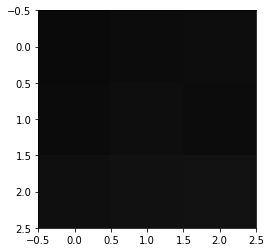

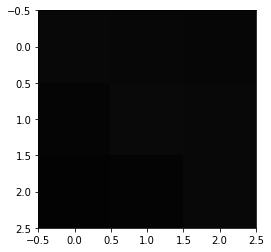

In [129]:
f=[[1,3,4],[2,5,3],[6,8,9]]
f=np.asarray(f)

w=[[-1,-2,-3],[-4,0,-1],[-6,-5,-1]]
w = np.asarray(w)

plotImage(f)
plotImage(w)

### padding to f

(5, 5)


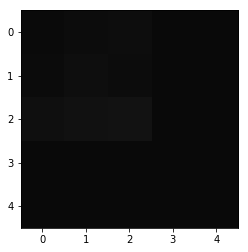

[[1 3 4 0 0]
 [2 5 3 0 0]
 [6 8 9 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


In [130]:
f=np.insert(f, f.shape[1], 0, axis=1)# columns padding
f=np.insert(f, f.shape[1], 0, axis=1)
f=np.insert(f, f.shape[0], 0, axis=0)#row padding
f=np.insert(f, f.shape[0], 0, axis=0)

print(f.shape)
plotImage(f)
print(f)

### w: padding and shifting

(5, 5)


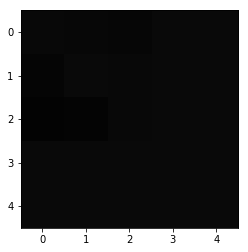

[[-1 -2 -3  0  0]
 [-4  0 -1  0  0]
 [-6 -5 -1  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]


In [131]:
w=np.insert(w, w.shape[1], 0, axis=1)#Collumn padding
w=np.insert(w, w.shape[1], 0, axis=1)
w=np.insert(w, w.shape[0], 0, axis=0)#row padding
w=np.insert(w, w.shape[0], 0, axis=0)

print(w.shape)
plotImage(w)
print(w)

[[-2 -3  0  0 -1]
 [ 0 -1  0  0 -4]
 [-5 -1  0  0 -6]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]
[[ 0 -1  0  0 -4]
 [-5 -1  0  0 -6]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [-2 -3  0  0 -1]]


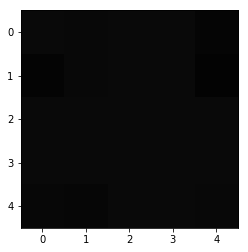

In [132]:
w=np.roll(w,-1,axis=1)
print(w)
w=np.roll(w,-1,axis=0)
print(w)
plotImage(w)

### calculating DFT

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


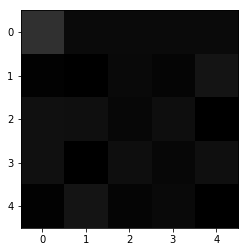

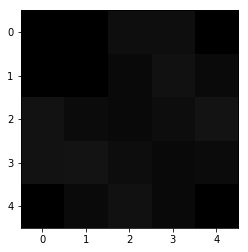

In [138]:
dft_f=np.fft.fft2(f)
dft_w=np.fft.fft2(w)

plotImgFloat(dft_f)
plotImgFloat(dft_w)

### calculating Hardaman Product(element wise product)

In [134]:
h_prod= dft_f * dft_w #hardman product = element-wise product ==np.multiply(dft_f,dft_w)
print(h_prod)

[[-9.43000000e+02  +0.j         -1.52442719e+02+288.37917307j
   2.64427191e+01 +31.02341921j  2.64427191e+01 -31.02341921j
  -1.52442719e+02-288.37917307j]
 [ 2.10814042e+02+200.3501425j   1.74206651e+02 -16.11496021j
  -2.62616461e+00  -0.6205414j  -4.15410197e+01  -6.15536707j
   5.58434588e+01 +80.71355835j]
 [ 1.06859580e+01+177.71063671j  2.55410197e+01  +1.45308506j
  -2.06651122e-01  +0.5550291j   2.56565412e+01  +1.25359454j
  -1.23373835e+02 +18.01707325j]
 [ 1.06859580e+01-177.71063671j -1.23373835e+02 -18.01707325j
   2.56565412e+01  -1.25359454j -2.06651122e-01  -0.5550291j
   2.55410197e+01  -1.45308506j]
 [ 2.10814042e+02-200.3501425j   5.58434588e+01 -80.71355835j
  -4.15410197e+01  +6.15536707j -2.62616461e+00  +0.6205414j
   1.74206651e+02 +16.11496021j]]


In [135]:
dft_2d = np.fft.ifft2(h_prod).round()
real_part = np.real(dft_2d)
real_part

array([[ -21.,  -36.,  -24.,  -13.,   -6.],
       [ -63.,  -97.,  -70.,  -34.,  -20.],
       [ -72.,  -87.,  -28.,  -12.,  -36.],
       [ -78., -100.,  -53.,   -9.,  -36.],
       [  -5.,  -13.,  -17.,  -12.,   -1.]])

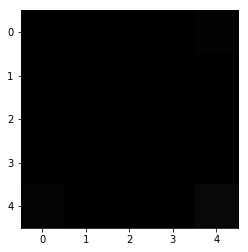

In [136]:
plotImage(real_part)